# Shorのアルゴリズムに関する検証

## Shorのアルゴリズムとは

量子コンピュータの可能性を語る上で、必ず登場するのが「Shor（ショア）のアルゴリズム」です。これは1994年に数学者 Peter Shor によって提案された、**素因数分解を効率的に行うための量子アルゴリズム**です。素因数分解とは、自然数を素数の積に分解する操作のことを指します。たとえば 15 を 3 × 5 に分解するのは容易ですが、桁数が数百桁に及ぶ大きな数を素因数分解するのは古典コンピュータにとって極めて困難です。

この「素因数分解の困難さ」は、現代暗号の基盤のひとつになっています。特に広く利用されているRSA暗号は、大きな数を素因数分解することが実用的に不可能である、という前提の上に成り立っています。もし効率的な素因数分解の手法が見つかれば、RSA暗号は短時間で破られてしまい、現在のインターネットセキュリティに大きな影響を与えることになります。Shorのアルゴリズムは、まさにその「不可能と思われていた計算」を可能にする潜在力を持っています。

| アプローチ | 提案時期 | 計算量の目安 | 特徴 | 現状の位置づけ |
|------------|----------|--------------|------|----------------|
| 試し割り法 | 古代〜 | $O(\sqrt{N})$ | 最も基本的。小さな数では有効だが、大きな数には非現実的。 | 教材・理論的説明用 |
| Pollard の rho 法 | 1975 | $O(\sqrt{p})$（$p$は最小因数） | 疑似乱数を利用。中規模の因数探索に有効。 | 実用的な下位手法として活用 |
| 楕円曲線法（ECM） | 1985 | 因数の大きさに依存 | 小さな因数が存在する場合に高速。並列化も可能。 | 実用的手法として現役 |
| 一般数体篩（GNFS） | 1990年代 | 準指数時間 $L_N[1/3]$ | 現在知られる古典最速アルゴリズム。RSA 250 などを分解。 | 古典的には最強 |
| Shor のアルゴリズム | 1994 | 多項式時間 $O((\log N)^3)$ | 位数推定を量子計算で効率化。RSA暗号を理論的に破れる。 | 実機での実用は未達成 |


## 素因数分解に対するShorのアルゴリズムのアプローチ

Shorのアルゴリズムの核心は、いったん「素因数分解」という問題を直接扱うのではなく、**位数推定（order finding）問題に変換する**点にあります。  
位数とは、ある整数 $a$ に対して

$$
a^r \equiv 1 (\mathrm{mod} N)
$$

を満たす最小の正整数 $r$のことです。この $r$ を求めることができれば、そこから高い確率で $N$ の非自明な因数を導き出せることが知られています。  
つまり、素因数分解を「位数を見つける」という別の問題に置き換えることが可能なのです。

ではなぜ、この変換が重要なのでしょうか。古典計算機で位数を求めるには、順に累乗を計算しながら周期性を探すしかなく、計算量は指数関数的に増えていきます。しかし量子計算では、量子ビットの**重ね合わせ**と**干渉**の性質を活用することで、多数の累乗結果を一度に計算し、その周期性を効率的に抽出できるのです。特に、量子フーリエ変換（Quantum Fourier Transform, QFT）は周期構造を非常に高速に検出できる演算であり、この処理がShorのアルゴリズムにおける最大のブレイクスルーとなっています。

このように、「素因数分解 → 位数推定 → 量子フーリエ変換」という流れを取ることで、量子計算の特性を最大限に活かすことができます。従来のコンピュータが指数時間を要する部分を、量子コンピュータは多項式時間で解ける可能性がある。これが、Shorのアルゴリズムが量子計算の代表例として注目され続けている理由です。

## Shorのアルゴリズムのステップ概要
Shorのアルゴリズムは、以下の主要なステップで構成されます。
1. **前処理（古典計算）**:
   - 対象の数 $N$ に対して、ランダムに整数 $a$ (ただし $a$ と $N$ は互いに素)を選びます。
   - $a$ と $N$ の最大公約数を計算し、もし非自明な因数が見つかればそれを出力して終了します。
2. **量子位数推定（量子計算）**:
   - 量子ビットを用いて、関数 $f(x) = a^x \mod N$ の周期を見つけるための量子回路を構築します。
   - 量子フーリエ変換（QFT）を適用し、周期 $r$ を効率的に推定します。
3. **後処理（古典計算）**:
   - 推定された周期 $r$ を用いて、因数を計算します。
   - ただし、場合によっては条件を満たさず因数が得られないこともあります。そのときは再び別の $a$ を選んで繰り返します。

## 量子計算のポイント
### 位数探索における位相推定の役割

位数 $r$ を古典的に求めるのは計算的に非常に困難ですが、量子計算では **位相推定（phase estimation）** を利用することで、この周期 $r$ を効率的に推定できます。  

位相推定（phase estimation）は、「あるユニタリ演算子 $U$ の固有値の位相 $\theta$ を推定する」アルゴリズムです。
固有方程式が

$$
U \ket{\psi} = e^{2\pi i \theta} \ket{\psi}
$$

で表されるとき、位相推定回路は $\theta$ の近似値 $\frac{y}{2^m}$ を 一定の精度（$m$ ビットの精度）で出力します。

量子回路の上側の $m$ 量子ビットが測定レジスタ、下側の $n$ 量子ビットが固有状態 $\ket{\psi}$ です。
制御付きユニタリ $U^{2^k}$ によって生じる「位相キックバック」により、固有値の位相情報が上側のビット列に転写されます。
その後、**逆量子フーリエ変換（inverse QFT）** を適用することで、周期的な位相構造を **測定可能なピーク（周波数成分）** として抽出します。
このメカニズムが、位数探索における周期性検出の中核を担っています。

位相推定では、制御付きの $U^{2^k} = M_a^{2^k}$ を効率的に実装する必要があります。これは単純に回路を $2^k$ 回繰り返すのではなく、古典的に $b = a^{2^k} ; (\mathrm{mod}; N)$ を計算し、その結果を用いて $M_b$ の回路を構成することで効率化できます。(Modular exponentiation  )
この方法により、指数を2の累乗に限定して事前計算することで、回路の深さを大幅に抑えることができます。

---

### 位数探索への応用

この位相推定を位数探索に応用するには、まずユニタリ演算 $U$ を「法 $N$ の下での掛け算」として定義します。
具体的には、$a \in \mathbb{Z}^*_N$ に対して

$$
M_a \ket{x} = \ket{a x ; (\mathrm{mod}; N)}
$$

と定義します。
数学的に $M_a$ はユニタリ演算であり、固有値は

$$
\omega_r^j = e^{2\pi i \frac{j}{r}} \quad (j=0,\dots,r-1)
$$

という形になります。
ここで分母 $r$ がまさに求めたい「位数」に対応しているため、
位相推定によって固有値の位相 $\frac{j}{r}$ を推定できれば、$r$ を高精度に求めることができます。

理想的には固有状態 $\ket{\psi_1}$ を直接準備するのが最も簡潔ですが、これは実際には難しいため、
計算基底状態 $\ket{1}$ を用いて代替します。
$\ket{1}$ は $M_a$ の固有状態ではありませんが、すべての固有状態 $\ket{\psi_k}$ の一様重ね合わせとして表せます：

$$
\ket{1} = \frac{1}{\sqrt{r}} \sum^{r-1}_{k=0} \ket{\psi_k}
$$

そのため、位相推定を $\ket{1}$ で実行すると、固有値のいずれか $\frac{k}{r}$ に対応する位相がランダムに得られます。
複数回の試行を通じて、十分な精度で $r$ を推定することが可能です。


## 例：$N=15$の素因数分解

Shorのアルゴリズムの実装は2001年にIBMの研究チームによって初めて実現されました。この実験では、$N=15$ の素因数分解を対象とし、量子ビット数が非常に限られた中でアルゴリズムの基本的な動作を示しました。まずは、$N=15$ の素因数分解をShorのアルゴリズムでどのように進めるかを見ていきましょう。

In [ ]:
!pip install qiskit[visualization]>=2.1.2
!pip install qiskit_ibm_runtime>=0.41.1
!pip install matplotlib>=3.10.6

In [1]:
import numpy as np
import pandas as pd
from fractions import Fraction
from math import gcd
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import QFT
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

In [2]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakePerth, FakeTorino

backend = FakePerth()
backend_torino = FakeTorino()

In [3]:
def calculate_factors(a, r, N):
    """
    Calculate non-trivial factors of N given a, r.
    Args:
        a (int): A randomly chosen integer such that 1 < a < N and gcd(a, N) = 1.
        r (int): The order of a modulo N (the smallest integer such that a^r ≡ 1 (mod N)).
        N (int): The integer to be factored
    """
    
    if r % 2 != 0:
        raise ValueError("r must be even to compute factors.")
    
    x_plus = pow(a, r // 2, N) + 1
    x_minus = pow(a, r // 2, N) - 1

    factor1 = gcd(x_plus, N)
    factor2 = gcd(x_minus, N)
    if factor1 == 1 or factor1 == N:
        print("Failed to find non-trivial factor with x+.")
    else:
        print(f"Non-trivial factor found with x+: {factor1}")
    if factor2 == 1 or factor2 == N:
        print("Failed to find non-trivial factor with x-.")
    else:
        print(f"Non-trivial factor found with x-: {factor2}")
    return factor1, factor2

### 量子回路の構築

例えば $a=11$ を例に、関数 $M_{11} \ket{x} = \ket{11x ; (\mathrm{mod}; 15)}$ を計算する量子回路 $M_{11}$ を構築します。  
ここで $x$ は「古典的な整数変数」として現れる一方で、量子回路上では $|x\rangle$ という状態に符号化された量子レジスタで表現されます。  

必要な量子ビットは以下の3種類です。
- 量子レジスタ control: 入力整数 $x$ を符号化する（制御レジスタ）
- 量子レジスタ target: 法 $N$ の下での掛け算の結果を格納する（出力レジスタ）
- 古典レジスタ output: 測定結果を保存する

**ここで少しズルを行います。**  
$a=11$ の場合、$M^k_{11}$ は次のように計算されます。

\begin{align*}
M^{2^0}_{11}\ket{1} &\equiv　M_{11} \ket{1} &\equiv \ket{11} \pmod{15} \\
M^{2^1}_{11}\ket{1} &\equiv　M_{11} \ket{11} &\equiv \ket{1} \pmod{15} \\
M^{2^2}_{11}\ket{1} &\equiv　M^{2}_{11} \ket{1} &\equiv \ket{1} \pmod{15} \\
\vdots \\
\end{align*}

$k\geq1$ のとき、$M^{2^k}_{11} = I$ とみなせるため無視できます。初期状態は $|1\rangle$ なので、$|1\rangle \to |11\rangle$ に写像するだけで十分です。  
すなわち、$|0001\rangle \mapsto |1011\rangle$ という操作を実装した回路を構築します。


In [4]:
def M11mod15():
    """
    M_11(mod15)
    """
    b = 11
    U = QuantumCircuit(4)
    U.cx(0, 3)
    U.cx(0, 1)

    U = U.to_gate()
    U.name = f"M_{b}"

    return U

In [5]:
def a2kmodN(a, k, N):
    """Compute a^{2^k} (mod N) by repeated squaring"""
    for _ in range(k):
        a = int(np.mod(a**2, N))
    return a

In [6]:
N = 15
a = 11 

# 必要な量子ビット数の計算
# num_target = floor(log(N - 1, 2)) + 1  # モジュラー展開のための量子ビット
# num_control = 2 * num_target  # 位相推定精度のための量子ビット

num_target = 4
num_control = 3

# List of M_b operators in order
k_list = range(num_control)
b_list = [a2kmodN(a, k, N) for k in k_list]
 
# Initialize the circuit
control = QuantumRegister(num_control, name="C")
target = QuantumRegister(num_target, name="T")
output = ClassicalRegister(num_control, name="out")
circuit = QuantumCircuit(control, target, output)
 
# Initialize the target register to the state |1>
circuit.x(num_control)
 
# Add the Hadamard gates and controlled versions of the
# multiplication gates
for k, qubit in enumerate(control):
    circuit.h(k)
    b = b_list[k]
    if b == 11:
        circuit.compose(
            M11mod15().control(), qubits=[qubit] + list(target), inplace=True
        )
    else:
        continue  # M1 is the identity operator
 
# Apply the inverse QFT to the control register
circuit.compose(QFT(num_control, inverse=True), qubits=control, inplace=True)
 
# Measure the control register
circuit.measure(control, output)

/var/folders/5d/m3c9w3p12qj3whkf54ysd62m0000gn/T/ipykernel_86958/2590135748.py:37: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  circuit.compose(QFT(num_control, inverse=True), qubits=control, inplace=True)


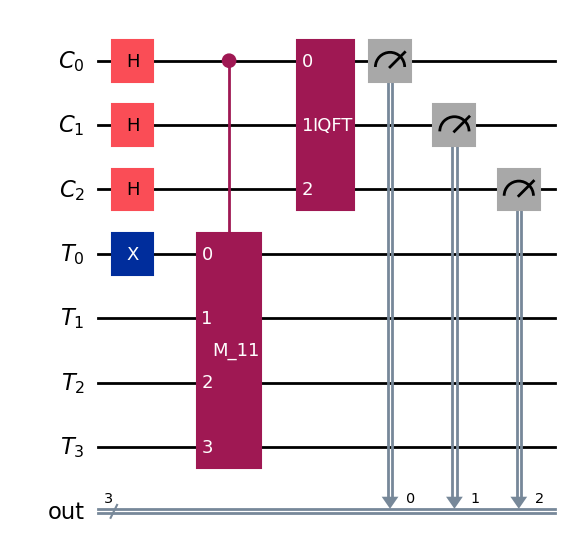

In [7]:
circuit.draw("mpl", fold=-1)

In [8]:
circuit_decomposed = circuit.decompose().decompose().decompose().decompose()
print(f"qubits: {circuit_decomposed.num_qubits}")
print(f"2q-depth: {circuit_decomposed.depth(lambda x: x.operation.num_qubits==2)}")
print(f"2q-size: {circuit_decomposed.size(lambda x: x.operation.num_qubits==2)}")
print(f"Operator counts: {circuit_decomposed.count_ops()}")

qubits: 7
2q-depth: 21
2q-size: 21
Operator counts: OrderedDict([('u', 34), ('cx', 21), ('measure', 3)])


### 回路のトランスパイル

In [9]:
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
circ_a11 = pm.run(circuit)

### 回路の測定

In [10]:
sampler = Sampler(mode=backend)
job = sampler.run([circ_a11], shots=10000)
print(f"Job ID: {job.job_id()}")

Job ID: cc410766-9476-47a7-b9e2-f9804703768d


### 結果の可視化

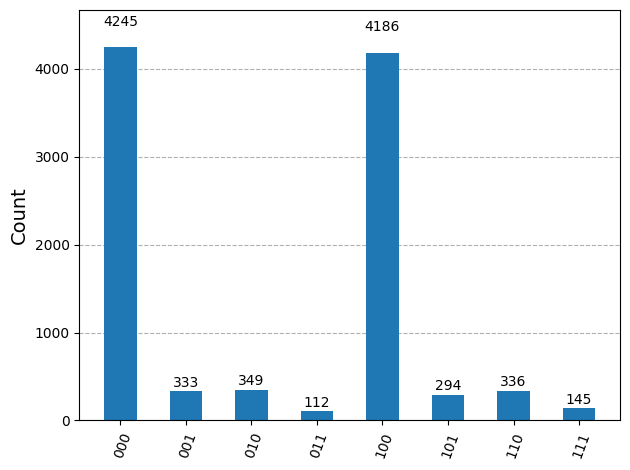

In [11]:
# get results
result = job.result()
counts = result[0].data.out.get_counts()
plot_histogram(counts)

### 位数の推定



In [12]:
# Rows to be displayed in table
rows = []
# Corresponding phase of each bitstring
measured_phases = []
 
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    decimal = int(bitstring, 2)  # Convert bitstring to decimal
    phase = decimal / (2**num_control)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    frac = Fraction(phase).limit_denominator(15)
    # Add these values to the rows in our table:
    rows.append(
        [
            f"{bitstring}(bin) = {decimal:>3}(dec)",
            f"{count} shots",
            f"{decimal}/{2 ** num_control} = {phase:.2f}",
            f"{frac.numerator}/{frac.denominator}",
            frac.denominator
        ]
    )
 
# Print the rows in a table
headers = ["Register Output", "Count", "Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)

df

,Register Output,Count,Phase,Fraction,Guess for r
0,000(bin) = 0(dec),4245 shots,0/8 = 0.00,0/1,1
1,100(bin) = 4(dec),4186 shots,4/8 = 0.50,1/2,2
2,010(bin) = 2(dec),349 shots,2/8 = 0.25,1/4,4
3,110(bin) = 6(dec),336 shots,6/8 = 0.75,3/4,4
4,001(bin) = 1(dec),333 shots,1/8 = 0.12,1/8,8
5,101(bin) = 5(dec),294 shots,5/8 = 0.62,5/8,8
6,111(bin) = 7(dec),145 shots,7/8 = 0.88,7/8,8
7,011(bin) = 3(dec),112 shots,3/8 = 0.38,3/8,8


In [13]:
calculate_factors(a, r=2, N=15)

Non-trivial factor found with x+: 3
Non-trivial factor found with x-: 5


(3, 5)

## $N=21$ の素因数分解：スケールの壁

前節では、比較的単純なケースとして $ N = 15 $ の因数分解を扱いました。  
この節では、より大きな数 $ N = 21 $ を対象とした場合に、量子回路の構造や実行コストがどのように変化するかを確認します。  

### 量子回路の構築

#### 位数推定のための回路構造の増大

Shorのアルゴリズムの中核である量子位数推定では、
関数 $f(x) = a^x \bmod N$ の周期 $r$ を見つけるために、**モジュラー指数演算** を量子回路として実装する必要があります。  
この部分は、入力レジスタの値 $ x $ に応じて、累乗 $ a^x $ を mod $ N $ で計算し出力する処理であり、ビット数が1増えるごとに、指数演算と剰余演算の組み合わせが指数的に複雑化します。

たとえば、
$ N=15 $ の場合はおよそ 7量子ビットで回路を構成できましたが、$ N=21 $ の場合には 10量子ビット以上が必要となり、ゲート数も数倍に増加します。

この増大は単に「回路が長くなる」だけでなく、各ゲートに付随する誤りやノイズが蓄積するため、**実機で安定して周期を観測することが極めて難しく**なります。


#### QFT（量子フーリエ変換）の影響

位数推定の最後には QFT（Quantum Fourier Transform）が適用され、周期性を干渉パターンとして観測可能な形に変換します。

$ N=21 $ のように必要なレジスタビット数が増えると、QFT自体のゲート数も急増し、
さらに全ビット間の相互作用を必要とするため、回路の深さが増大します。  
結果として、シミュレーション上では周期的ピークが現れるものの、実機ではノイズによりピークがぼやけ、周期を正確に読み取ることが困難になります。

In [14]:
from qiskit import qasm2

N = 21
a = 4 

num_control = 10

circuit = qasm2.load('factor21.qasm')

In [15]:
circuit.draw('mpl', fold=-1)

In [16]:
circuit_decomposed = circuit.decompose().decompose().decompose().decompose()

print(f"qubits: {circuit_decomposed.num_qubits}")
print(f"2q-depth: {circuit_decomposed.depth(lambda x: x.operation.num_qubits==2)}")
print(f"2q-size: {circuit_decomposed.size(lambda x: x.operation.num_qubits==2)}")
print(f"Operator counts: {circuit_decomposed.count_ops()}")

qubits: 15
2q-depth: 2057
2q-size: 2405
Operator counts: OrderedDict([('u', 3414), ('cx', 2405), ('if_else', 45), ('measure', 10)])


### 回路のトランスパイル

In [17]:
pm_torino = generate_preset_pass_manager(optimization_level=1, backend=backend_torino)
circ_a4_torino = pm_torino.run(circuit)

### 回路の測定
※注意: 実行に時間を要します

In [18]:
sampler = Sampler(mode=backend_torino)
job = sampler.run([circ_a4_torino], shots=10000)
print(f"Job ID: {job.job_id()}")

Job ID: 015e4751-582a-49e4-b0fd-433596977c58


### 結果の可視化

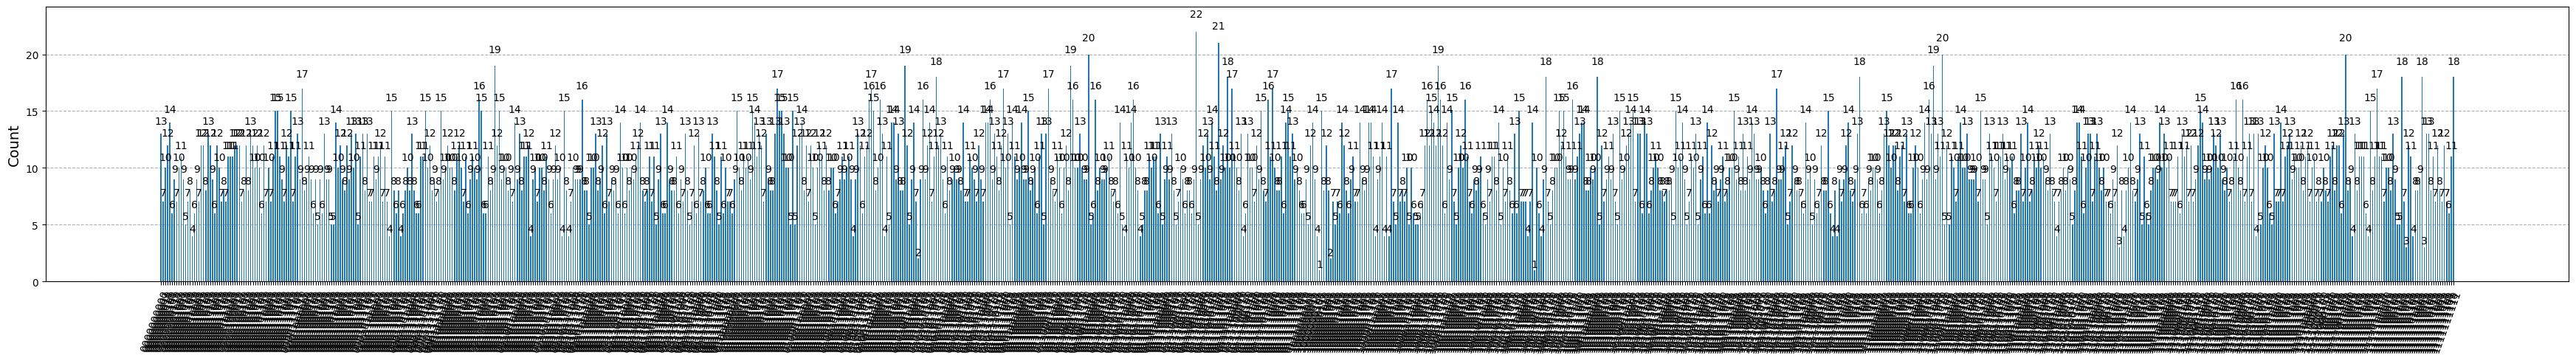

In [19]:
result_n21 = job.result()
counts_n21 = result_n21[0].join_data().get_counts()
plot_histogram(counts_n21, figsize=(35, 5))

In [20]:
# Rows to be displayed in table
rows = []
# Corresponding phase of each bitstring
measured_phases = []
 
for bitstring, count in sorted(counts_n21.items(), key=lambda x: x[1], reverse=True):
    decimal = int(bitstring, 2)  # Convert bitstring to decimal
    phase = decimal / (2**num_control)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    frac = Fraction(phase).limit_denominator(15)
    # Add these values to the rows in our table:
    rows.append(
        [
            f"{bitstring}(bin) = {decimal:>3}(dec)",
            f"{count} shots",
            f"{decimal}/{2 ** num_control} = {phase:.2f}",
            f"{frac.numerator}/{frac.denominator}",
            frac.denominator
        ]
    )
 
# Print the rows in a table
headers = ["Register Output", "Count", "Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)

df

,Register Output,Count,Phase,Fraction,Guess for r
0,0111001110(bin) = 462(dec),22 shots,462/1024 = 0.45,5/11,11
1,0111011000(bin) = 472(dec),21 shots,472/1024 = 0.46,6/13,13
2,0110011110(bin) = 414(dec),20 shots,414/1024 = 0.40,2/5,5
3,1100011011(bin) = 795(dec),20 shots,795/1024 = 0.78,7/9,9
4,1111001111(bin) = 975(dec),20 shots,975/1024 = 0.95,14/15,15
...,...,...,...,...,...
1019,1111101010(bin) = 1002(dec),3 shots,1002/1024 = 0.98,1/1,1
1020,0101010010(bin) = 338(dec),2 shots,338/1024 = 0.33,1/3,3
1021,1000001010(bin) = 522(dec),2 shots,522/1024 = 0.51,1/2,2
1022,1000000101(bin) = 517(dec),1 shots,517/1024 = 0.50,1/2,2


### 位数の推定

In [21]:
calculate_factors(a, r=2, N=21)

Failed to find non-trivial factor with x+.
Non-trivial factor found with x-: 3


(1, 3)

# 実機を使った計算

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
  channel="ibm_quantum_platform",
  token="<YOUR_IBM_QUANTUM_TOKEN>",
  instance="<YOUR_IBM_QUANTUM_INSTANCE>",
  name="demo_shor",
  set_as_default=True,
  overwrite=True
)

In [ ]:
service = QiskitRuntimeService(name="demo_shor")
service.saved_accounts()

In [24]:
service = QiskitRuntimeService()
backend_hardware = service.least_busy(min_num_qubits=14)

print(backend_hardware.name)

ibm_torino


In [25]:
pm_torino = generate_preset_pass_manager(optimization_level=1, backend=backend_hardware)
circ_a4_torino = pm_torino.run(circuit)

In [26]:
sampler = Sampler(mode=backend_hardware)
job = sampler.run(pubs=[circ_a4_torino], shots=10000)
print(f"Job ID: {job.job_id()}")

Job ID: d3lqkdb4kkus739d1bd0


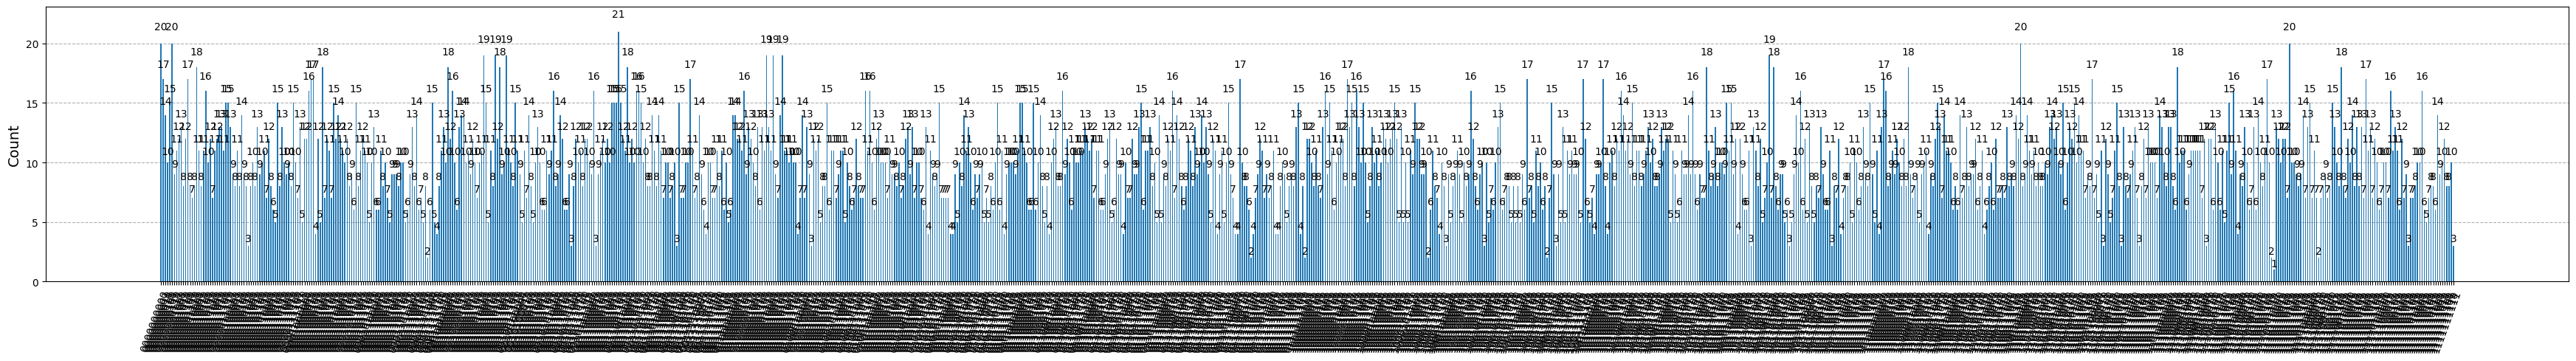

In [27]:
result_n21_hardware = job.result()
counts_n21_hardware = result_n21_hardware[0].join_data().get_counts()
plot_histogram(counts_n21_hardware, figsize=(35, 5))

In [28]:
# Rows to be displayed in table
rows = []
# Corresponding phase of each bitstring
measured_phases = []
 
for bitstring, count in sorted(counts_n21_hardware.items(), key=lambda x: x[1], reverse=True):
    decimal = int(bitstring, 2)  # Convert bitstring to decimal
    phase = decimal / (2**num_control)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    frac = Fraction(phase).limit_denominator(15)
    # Add these values to the rows in our table:
    rows.append(
        [
            f"{bitstring}(bin) = {decimal:>3}(dec)",
            f"{count} shots",
            f"{decimal}/{2 ** num_control} = {phase:.2f}",
            f"{frac.numerator}/{frac.denominator}",
            frac.denominator
        ]
    )
 
# Print the rows in a table
headers = ["Register Output", "Count", "Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)

df

,Register Output,Count,Phase,Fraction,Guess for r
0,0011001100(bin) = 204(dec),21 shots,204/1024 = 0.20,1/5,5
1,1100111110(bin) = 830(dec),20 shots,830/1024 = 0.81,9/11,11
2,0000000000(bin) = 0(dec),20 shots,0/1024 = 0.00,0/1,1
3,0000000101(bin) = 5(dec),20 shots,5/1024 = 0.00,0/1,1
4,1110110110(bin) = 950(dec),20 shots,950/1024 = 0.93,13/14,14
...,...,...,...,...,...
1018,1110101110(bin) = 942(dec),2 shots,942/1024 = 0.92,12/13,13
1019,1000110110(bin) = 566(dec),2 shots,566/1024 = 0.55,5/9,9
1020,1111000011(bin) = 963(dec),2 shots,963/1024 = 0.94,14/15,15
1021,0001110111(bin) = 119(dec),2 shots,119/1024 = 0.12,1/9,9


まだまだ位数の推定は難しいです。

## 実用化への道のり

前節で確認したように、Shorのアルゴリズムをわずかにスケールアップするだけでも、  
量子回路の複雑さは急激に増大し、現実の量子ハードウェアでは安定した結果を得ることが難しくなります。  
この節では、「理論上のブレークスルー」と「実機での実現」の間にあるギャップを整理します。


### 実用化を阻む最大の要因：量子ビット数と誤り率

RSA-2048をShorのアルゴリズムで解読するには、  
**理論上、数百万〜数千万の論理量子ビット（error-corrected qubits）** が必要とされます。

しかし、現在の量子デバイスはまだ **数百〜数千の物理量子ビット** にとどまっており、  
しかもこれらのビットはノイズに非常に敏感です。  
各ゲート操作や測定でわずかな誤りが生じるため、長い回路では誤りが累積して結果が崩壊してしまいます。

これを克服するには「**量子誤り訂正（Quantum Error Correction）**」が不可欠です。  
誤り訂正では、1つの論理量子ビットを維持するために多数の物理量子ビットを束ねて冗長化します。  
そのため、実際には「量子ビット数を増やす」だけでは不十分であり、  
**誤り耐性を確保しつつ動作する巨大な量子プロセッサ** が必要となります。


### フォールトトレラント量子計算への挑戦

フォールトトレラント（Fault-Tolerant）量子計算とは、  
ノイズや誤りが一定の範囲内であっても計算結果を安定して得られるよう設計された計算方式です。  

これを実現するには、
- 高忠実度の量子ゲート（誤り率 10⁻⁴ 以下）  
- 低クロストークのデバイスアーキテクチャ  
- トポロジカル量子ビットや表面符号（Surface Code）などの誤り訂正手法  
が必要になります。

これらの開発には膨大なハードウェア工学と制御技術の進展が求められており、  
現在は各国の研究機関や企業（IBM、Google、IonQ、Rigetti など）が競い合いながら進めています。


### 現在地：NISQ時代からの進化

私たちが現在扱える量子デバイスは「**NISQ（Noisy Intermediate-Scale Quantum）**」と呼ばれる段階にあります。  
これは「量子ビット数は100〜1000程度だが、誤り訂正はまだ導入できない」時代を意味します。

このNISQ時代には、Shorのようなフルスケールのアルゴリズムを動かすことは難しいものの、  
以下のような「中間的なアプローチ」が模索されています。

- ノイズを補償するためのエラー緩和技術（ZNE, Dynamical Decoupling, Probabilistic Error Cancellation）  
- 部分的な誤り訂正を行うハイブリッド方式  
- 位数推定を部分的に古典計算と組み合わせる**ハイブリッドShor回路**  

これらの試みは、将来的な大規模量子計算の道筋を見出す上で重要なステップとなっています。

## まとめ

ここまで、Shorのアルゴリズムの仕組みと、現在の量子ハードウェアでの実行例、そして実用化に向けた課題について見てきました。  

### Shorのアルゴリズムの本質的な意義

Shorのアルゴリズムは、単なる「素因数分解の高速化手法」ではありません。  
量子コンピュータが**古典計算では不可能なスケールで干渉・重ね合わせを利用できる**ことを最も明確に示したアルゴリズムです。

具体的には、
- 「周期性の検出」を量子並列性と干渉によって実現し、  
- フーリエ変換によってその周期を効率的に抽出する、  
という量子情報処理の本質が凝縮されています。  

この意味で、Shorのアルゴリズムは「量子計算の象徴的存在」であり、  
その実現は量子コンピューティング分野全体の技術的指標（ベンチマーク）ともなっています。


### 暗号へのインパクトとパラダイムシフト

もし大規模量子コンピュータが実現すれば、  
現在広く使われているRSAや楕円曲線暗号（ECC）は数学的に破られることになります。  

この事実は、**暗号の安全性を「計算の困難さ」に頼る時代の終焉**を意味します。  
そのため、各国ではすでに「ポスト量子暗号（Post-Quantum Cryptography, PQC）」の研究・標準化が進められています。

- 米国NISTは2022年に初のPQC標準候補（CRYSTALS-Kyber、Dilithiumなど）を選定。  
- 日本でもNICTや産総研が中心となり、量子安全な通信技術の開発を進行中。  

このように、Shorのアルゴリズムの登場は**暗号技術そのものの進化を促す引き金**となりました。